## import libraries

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection and Analysis

In [4]:
insurance_df = pd.read_csv("insurance.csv") 

In [5]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_df.shape

(1338, 7)

In [7]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
insurance_df.groupby('sex').mean()

C:\Users\subit\AppData\Local\Temp\ipykernel_17936\1769120007.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  insurance_df.groupby('sex').mean()


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [9]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### We have 3 categorical values in the dataset
1. sex
2. smoker
3. region

In [13]:
# Statistical Measures 
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Visualization

C:\Users\subit\AppData\Local\Temp\ipykernel_17936\1018197166.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['age'])


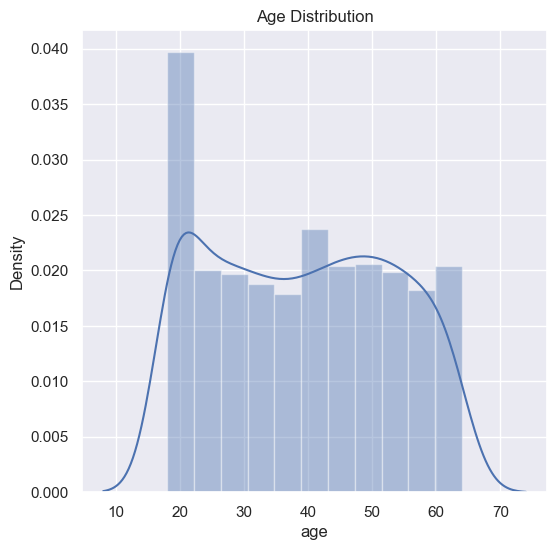

In [15]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['age'])
plt.title('Age Distribution')
plt.show()

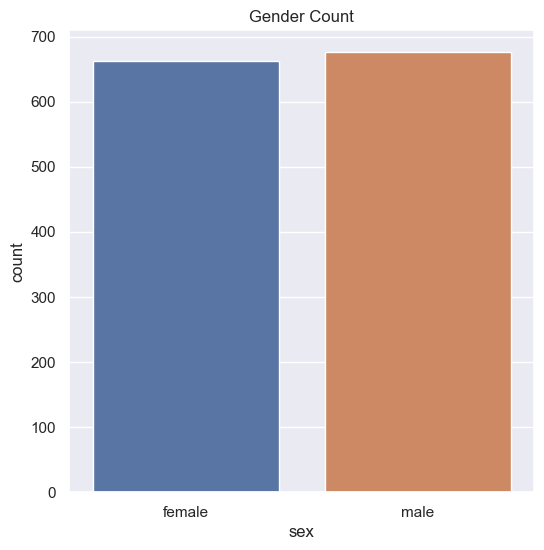

In [16]:
# Count for gender
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex', data = insurance_df)
plt.title('Gender Count')
plt.show()

In [17]:
insurance_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\subit\AppData\Local\Temp\ipykernel_17936\3299950464.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['bmi'])


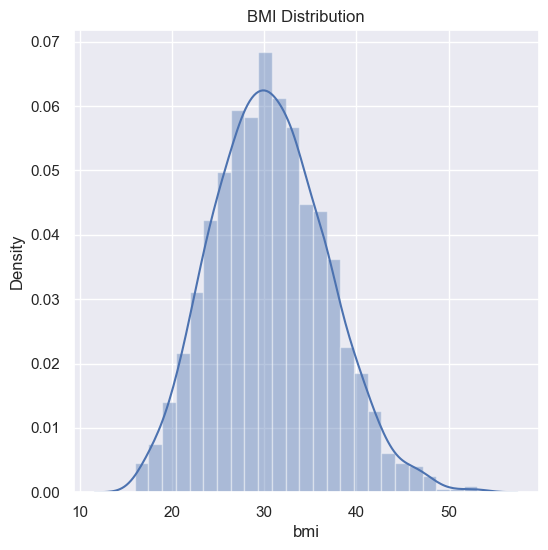

In [18]:
# distribution of bmi value
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['bmi'])
plt.title('BMI Distribution')
plt.show()

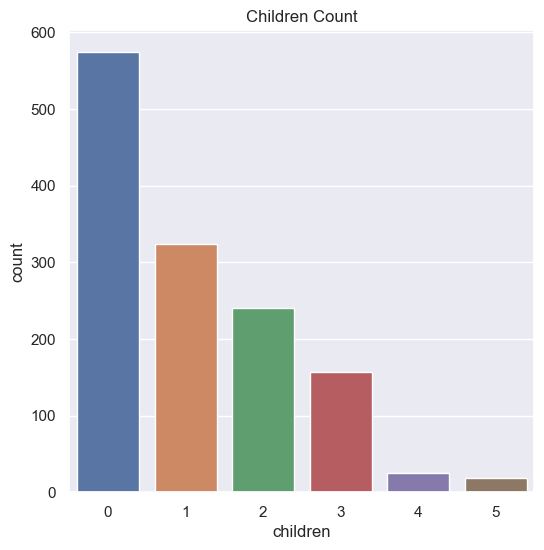

In [19]:
# Count for children column
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data = insurance_df)
plt.title('Children Count')
plt.show()

In [20]:
insurance_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

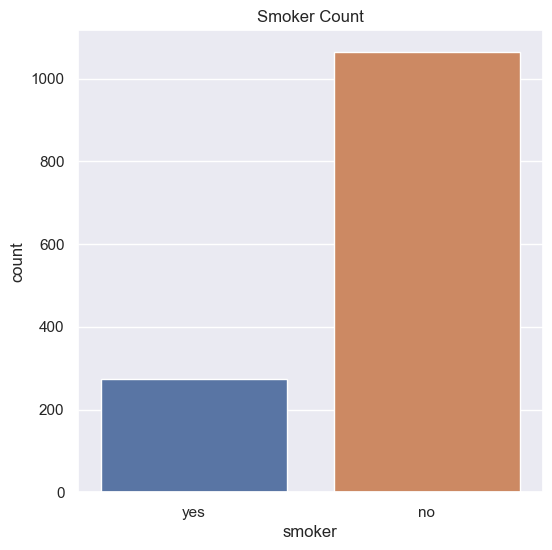

In [21]:
# Count for smoker column
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker', data = insurance_df)
plt.title('Smoker Count')
plt.show()

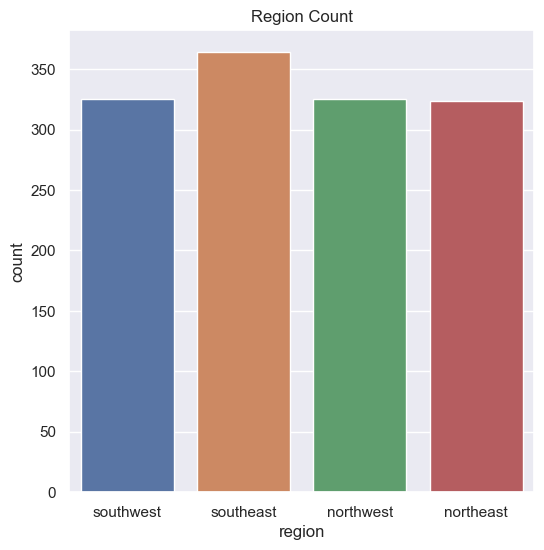

In [22]:
# Count for region column
plt.figure(figsize=(6,6))
sns.countplot(x = 'region', data = insurance_df)
plt.title('Region Count')
plt.show()

C:\Users\subit\AppData\Local\Temp\ipykernel_17936\3199599977.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['charges'])


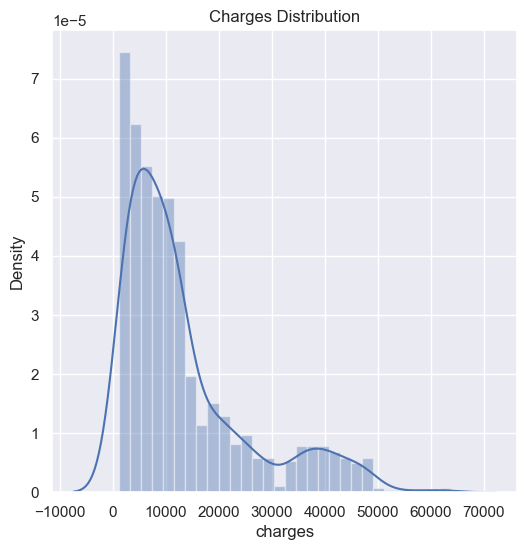

In [23]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['charges'])
plt.title('Charges Distribution')
plt.show()

## Data Preprocessing
Encoding the Categorial features

In [24]:
insurance_df.replace({'sex':{'male':0, 'female':1}, 'smoker':{'yes':0, 'no':1}, 
                      'region':{'southeast':0, 'southwest':1,'northeast':2,'northwest':3}},
                     inplace = True)

In [26]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [27]:
# Splitting the feature and Target
X = insurance_df.drop('charges', axis =1)
Y = insurance_df['charges']

In [28]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Splitting the data into training and testing data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Model Training

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [35]:
# Prediction on training data
predict_training = model.predict(X_train)

In [36]:
# R Squared Value: Error value
r2_trained = metrics.r2_score(Y_train, predict_training)
print("R squared value for training data: ", r2_trained)

R squared value for training data:  0.751505643411174


In [37]:
# Prediction on test data
predict_test = model.predict(X_test)

In [38]:
# R Squared Value: Error value
r2_test = metrics.r2_score(Y_test, predict_test)
print("R squared value for test data: ", r2_test)

R squared value for test data:  0.7447273869684077


## Building a Predictive system

In [44]:
#input_data = ( 33,0,22.705,0,1,3)
#input_data = (32,0,28.880,0,1,3)
input_data = (50,0,30.970,3,1,3)
numpy_input = np.asarray(input_data)
input_reshape = numpy_input.reshape(1,-1)

In [45]:
input_predict = model.predict(input_reshape)
print('Predicted value:', input_predict[0])

Predicted value: 12617.4316880958


C:\Users\subit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
